In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Dataset/bank-additional-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

<AxesSubplot:>

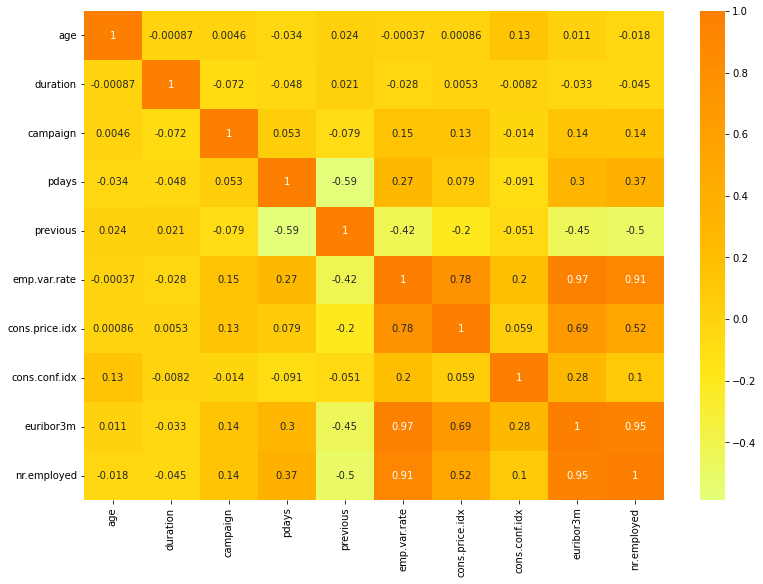

In [9]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),cmap='Wistia',annot=True)

In [10]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
df1=pd.get_dummies(df['y'],prefix=['Termdeposit'])

In [12]:
df1

,['Termdeposit']_no,['Termdeposit']_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
41183,0,1
41184,1,0
41185,1,0
41186,0,1


In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
df = pd.get_dummies(df, columns=['y'],prefix=['TermDeposit'],drop_first=True)

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,TermDeposit_yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [16]:
df = pd.get_dummies(df, columns=['housing'],prefix=['houseLoan'])

In [17]:
df = pd.get_dummies(df, columns=['loan'],prefix=['PersonalLoan'])

In [18]:
from sklearn import svm

In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'TermDeposit_yes', 'houseLoan_no', 'houseLoan_unknown',
       'houseLoan_yes', 'PersonalLoan_no', 'PersonalLoan_unknown',
       'PersonalLoan_yes'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   job                   41188 non-null  object 
 2   marital               41188 non-null  object 
 3   education             41188 non-null  object 
 4   default               41188 non-null  object 
 5   contact               41188 non-null  object 
 6   month                 41188 non-null  object 
 7   day_of_week           41188 non-null  object 
 8   duration              41188 non-null  int64  
 9   campaign              41188 non-null  int64  
 10  pdays                 41188 non-null  int64  
 11  previous              41188 non-null  int64  
 12  poutcome              41188 non-null  object 
 13  emp.var.rate          41188 non-null  float64
 14  cons.price.idx        41188 non-null  float64
 15  cons.conf.idx      

In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'TermDeposit_yes', 'houseLoan_no', 'houseLoan_unknown',
       'houseLoan_yes', 'PersonalLoan_no', 'PersonalLoan_unknown',
       'PersonalLoan_yes'],
      dtype='object')

In [22]:
df['PersonalLoan_yes']=df['PersonalLoan_yes'].astype(int)

In [23]:
df['PersonalLoan_no']=df['PersonalLoan_no'].astype(int)

In [24]:
df['PersonalLoan_unknown']=df['PersonalLoan_unknown'].astype(int)

In [25]:
df['TermDeposit_yes']=df['TermDeposit_yes'].astype(int)

In [26]:
df['houseLoan_no']=df['houseLoan_no'].astype(int)

In [27]:
df['houseLoan_unknown']=df['houseLoan_unknown'].astype(int)

In [28]:
x=df.drop(labels=['job','marital','education','default','contact','month','day_of_week','poutcome'],axis=1)

In [29]:
y=df[['TermDeposit_yes']]

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'TermDeposit_yes', 'houseLoan_no', 'houseLoan_unknown',
       'houseLoan_yes', 'PersonalLoan_no', 'PersonalLoan_unknown',
       'PersonalLoan_yes'],
      dtype='object')

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [32]:
clf=svm.SVC()

In [33]:
clf.fit(x_train,y_train)

C:\Users\kousa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [34]:
y_pred=clf.predict(x_test)

In [35]:
print(accuracy_score(y_test, y_pred))

0.8961722100833536


In [1]:
n=int(input())
dict={0:'h',1:'@',21:'t',0:'h',21:'t'}

01210


In [2]:
for i in n:
    print(i)

TypeError: 'int' object is not iterable

In [5]:
ne = str(input())
result = [x for x in ne]
print(result)

2121210
['2', '1', '2', '1', '2', '1', '0']


In [6]:
d = {'0': 'h', '1': '@', '2': 'c', '10': 'i' , '21':'t'}

In [7]:
val = str(input())
opt = ''
res = [x for x in val]
for i, s in enumerate(res):
    y = f"{res[i]res[i + 1]}"
    if d.get(y):
        print(d[y])

SyntaxError: f-string: invalid syntax (Temp/ipykernel_19656/62656676.py, line 5)

In [8]:
val = str(input())
opt = ''
res = [x for x in val]

210


In [9]:
res

['2', '1', '0']

In [10]:
for i, s in enumerate(res):
    check_val = "{}{}".format(res[i], res[i + 1])
    print(check_val)

21
10


IndexError: list index out of range

In [11]:
current_index = 0
for s in res:
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 < (current_index):
        ch = f"{res[current_index]res[current_index + 1]}"
        if d.get('ch'):
            ch = res[ch]
            current_index += 2
        else:
            current_index += 1
    opt += d[ch]
print(opt)

SyntaxError: f-string: invalid syntax (Temp/ipykernel_19656/3512855602.py, line 7)

In [12]:
current_index = 0
for s in res:
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 < (current_index):
        ch = "{}{}".format({res[current_index], res[current_index + 1]})
        if d.get('ch'):
            ch = res[ch]
            current_index += 2
        else:
            current_index += 1
    opt += d[ch]
print(opt)

c@h


In [13]:
current_index = 0
for s in res:
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 < (current_index):
        ch = "{}{}".format({res[current_index], res[current_index + 1]})
        if d.get(ch):
            ch = res[ch]
            current_index += 2
        else:
            current_index += 1
    print(ch)
    opt += d[ch]
print(opt)

2
1
0
c@hc@h


In [14]:
current_index = 0
opt = ''
for s in res:
    if current_index > i:
        continue
    ch = s
    print(len(res) - 1 < (current_index))
    if len(res) - 1 < (current_index):
        ch = "{}{}".format({res[current_index], res[current_index + 1]})
        if d.get(ch):
            ch = res[ch]
            current_index += 2
        else:
            current_index += 1
    print(ch)
    opt += d[ch]
print(opt)

False
2
False
1
False
0
c@h


In [15]:
current_index = 0
opt = ''
for s in res:
    if current_index > i:
        continue
    ch = s
    print(len(res) - 1 > (current_index))
    if len(res) - 1 < (current_index):
        ch = "{}{}".format({res[current_index], res[current_index + 1]})
        if d.get(ch):
            ch = res[ch]
            current_index += 2
        else:
            current_index += 1
    print(ch)
    opt += d[ch]
print(opt)

True
2
True
1
True
0
c@h


In [16]:
current_index = 0
opt = ''
for s in res:
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 > (current_index):
        ch = "{}{}".format({res[current_index], res[current_index + 1]})
        print(ch)
        if d.get(ch):
            ch = res[ch]
            current_index += 2
        else:
            ch = res[current_index]
            current_index += 1
    print(ch)
    opt += d[ch]
print(opt)

2
1
0
c@h


In [17]:
current_index = 0
opt = ''
for s in res:
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 > (current_index):
        ch = "{}{}".format({res[current_index], res[current_index + 1]})
        print(ch)
        if d.get(ch):
            ch = res[ch]
            current_index += 2
        else:
            ch = res[current_index]
            current_index += 1
    print(ch)
    opt += d[ch]
print(opt)

IndexError: Replacement index 1 out of range for positional args tuple

In [1]:
current_index = 0
opt = ''
for s in res:
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 > (current_index):
        print(res[current_index])
        print(res[current_index + 1])

NameError: name 'res' is not defined

In [2]:
res

NameError: name 'res' is not defined

In [3]:
val = str(input())
opt = ''
res = [x for x in val]
d = {'0': 'h', '1': '@', '2': 'c', '10': 'i' , '21':'t'}

210


In [4]:
res

['2', '1', '0']

In [5]:
current_index = 0
opt = ''
for s in res:
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 > (current_index):
        print(res[current_index])
        print(res[current_index + 1])

NameError: name 'i' is not defined

In [6]:
current_index = 0
opt = ''
for i, s in enumerate(res):
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 > (current_index):
        print(res[current_index])
        print(res[current_index + 1])

2
1
2
1
2
1


In [7]:
current_index = 0
opt = ''
for s in res:
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 > (current_index):
        print(res[current_index])
        print(res[current_index + 1])

2
1
2
1
2
1


In [8]:
current_index = 0
opt = ''
for s in res:
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 > (current_index):
        print(res[current_index])
        print(res[current_index + 1])
    current_index += 1

2
1
1
0


In [9]:
current_index = 0
opt = ''
for s in res:
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 > (current_index):
        ch = "{}{}".format({res[current_index], res[current_index + 1]})
        print(ch)
    current_index += 1

IndexError: Replacement index 1 out of range for positional args tuple

In [10]:
current_index = 0
opt = ''
for i, s in enumerate(res):
    if current_index > i:
        continue
    ch = s
    if len(res) - 1 > (current_index):
        ch = "{}{}".format({res[current_index], res[current_index + 1]})
        print(ch)
    current_index += 1

IndexError: Replacement index 1 out of range for positional args tuple

In [11]:
current_index = 0
opt = ''
for i, s in enumerate(res):
    if current_index > i:
        continue
    ch = s
    if (len(res) - 1) > (current_index):
        # ch = "{}{}".format({res[current_index], res[current_index + 1]})
        print(res[current_index])
        print(res[current_index + 1])
    current_index += 1

2
1
1
0


In [12]:
current_index = 0
opt = ''
for i, s in enumerate(res):
    if current_index > i:
        continue
    ch = s
    if (len(res) - 1) > (current_index):
        # ch = "{}{}".format({res[current_index], res[current_index + 1]})
        wd = res[current_index]
        wd += res[current_index + 1]
        print(wd)
    current_index += 1

21
10


In [21]:
current_index = 0
opt = ''
for i, s in enumerate(res):
    print(current_index)
    print(i)
    if current_index > i:
        continue
    ch = s
    if (len(res) - 1) > (current_index):
        wd = res[current_index]
        wd += res[current_index + 1]
        if d.get(wd):
            opt += d[wd]
            current_index += 2
        else:
            opt += d[s]
            current_index += 1
    else:
        opt += d[s]
        current_index += 1
print(opt)

0
0
2
1
2
2
th
